# Sampling

In [1]:
import pandas as pd
df = pd.read_csv("sample")
df

,smoker,treatment,dead
0,0,0,0
1,1,1,0
2,1,1,0
3,0,1,0
4,0,0,0
...,...,...,...
999995,0,0,0
999996,1,1,0
999997,0,0,0
999998,0,0,0


## Simple Random Sampling

Say you want to select a subset of a population in which each member of the subset has an equal probability of being chosen.

Below we select 100 sample points from a dataset.

In [3]:
sample_df = df.sample(5000)

In [ ]:
# sample_df

## Stratified Sampling

Assume that we need to estimate the average number of votes for each candidate in an election. Assume that the country has 3 towns:

Town A has 1 million factory workers,

Town B has 2 million workers, and

Town C has 3 million retirees.

We can choose to get a random sample of size 60 over the entire population but there is some chance that the random sample turns out to be not well balanced across these towns and hence is biased causing a significant error in estimation.

Instead, if we choose to take a random sample of 10, 20 and 30 from Town A, B and C respectively then we can produce a smaller error in estimation for the same total size of the sample.

You can do something like this pretty easily with Python:

In [4]:
X = df.iloc[:,:2]
y = df.iloc[:,2]

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.25)

In [6]:
import matplotlib.pyplot as plt

(array([[699177.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0., 300823.],
        [694225.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0., 305775.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 BarContainer objects>)

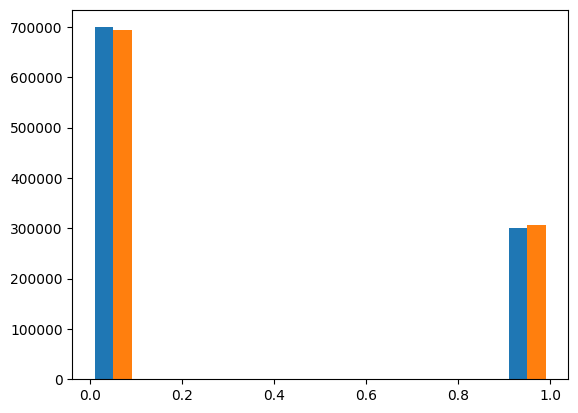

In [7]:
plt.hist(X)

(array([[524224.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0., 225776.],
        [520510.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0., 229490.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 BarContainer objects>)

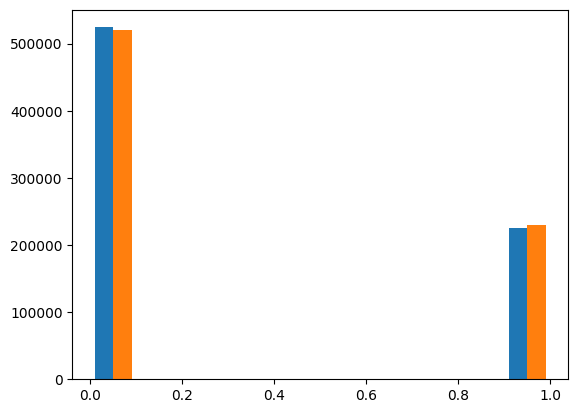

In [8]:
plt.hist(X_train)

## Reservoir Sampling'

I love this problem statement:

Say you have a stream of items of large and unknown length that we can only iterate over once.

Create an algorithm that randomly chooses an item from this stream such that each item is equally likely to be selected.

How can we do that?

Let us assume we have to sample 5 objects out of an infinite stream such that each element has an equal probability of getting selected.

In [ ]:
import random

def generator(max):
    number = 1
    while number < max:
        number += 1
        yield number
# Create as stream generator
stream = generator(10000)

# Doing Reservoir Sampling from the stream
k=5
reservoir = []
for i, element in enumerate(stream):
    if i+1<= k:
        reservoir.append(element)
    else:
        probability = k/(i+1)
        if random.random() < probability:
            # Select item in stream and remove one of the k items already selected
            reservoir[random.choice(range(0,k))] = element
                
                

In [ ]:
print(reservoir)

It can be mathematically proved that in the sample each element has the same probability of getting selected from the stream.

How?

It always helps to think of a smaller problem when it comes to mathematics.

So, let us think of a stream of only 3 items and we have to keep 2 of them.

We see the first item, we hold it in the list as our reservoir has space. We see the second item, we hold it in the list as our reservoir has space.

We see the third item. Here is where things get interesting. We choose the third item to be in the list with probability 2/3.

Let us now see the probability of first item getting selected:

The probability of removing the first item is the probability of element 3 getting selected multiplied by the probability of Element 1 getting randomly chosen as the replacement candidate from the 2 elements in the reservoir. That probability is:

2/3*1/2 = 1/3

Thus the probability of 1 getting selected is:

1–1/3 = 2/3

We can have the exact same argument for the Second Element and we can extend it for many elements.

Thus each item has the same probability of getting selected: 2/3 or in general k/n


## Random Undersampling and Oversampling

It is too often that we encounter an imbalanced dataset.

A widely adopted technique for dealing with highly imbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and/or adding more examples from the minority class (over-sampling).

Let us first create some example imbalanced data.

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_classes=2, class_sep=1.5, weights=[0.9, 0.1],
    n_informative=3, n_redundant=1, flip_y=0,
    n_features=20, n_clusters_per_class=1,
    n_samples=100, random_state=10
)
X = pd.DataFrame(X)
X['target'] = y

We can now do random oversampling and undersampling using:

In [ ]:
num_0 = len(X[X['target']==0])
num_1 = len(X[X['target']==1])

print(num_0,num_1)

# random undersample
undersampled_data = pd.concat([ X[X['target']==0].sample(num_1) , X[X['target']==1] ])

In [ ]:
print(len(undersampled_data))

# random oversample

oversampled_data = pd.concat([ X[X['target']==0] , X[X['target']==1].sample(num_0, replace=True) ])
print(len(oversampled_data))

In [ ]:
df1 = df.sample(100)
X = df1.iloc[:,:2]
y = df1.iloc[:,2]
n_0 = df1.loc[df1['smoker']==0,].shape[0]
n_1 = df1.loc[df1['smoker']==1,].shape[0]
n_0, n_1

In [ ]:
df_under = pd.concat([df1.loc[df1['smoker']==0,].sample(n_1), df1.loc[df1['smoker']==1,]])
df_under.shape

In [ ]:
df_over = pd.concat([df1.loc[df1['smoker']==0,], df1.loc[df1['smoker']==1,].sample(n_0, replace=True)])
df_over.shape

In [ ]:
plt.hist(df);

In [ ]:
plt.hist(df_under);

In [ ]:
plt.hist(df_over);

## Undersampling and Oversampling using imbalanced-learn

imbalanced-learn(imblearn) is a Python Package to tackle the curse of imbalanced datasets.

It provides a variety of methods to undersample and oversample.

a. Undersampling using Tomek Links:

One of such methods it provides is called Tomek Links. Tomek links are pairs of examples of opposite classes in close vicinity.

In this algorithm, we end up removing the majority element from the Tomek link which provides a better decision boundary for a classifier.

In [9]:
# !pip uninstall scikit-learn

In [18]:
from imblearn.under_sampling import TomekLinks

In [11]:
df = df.sample(1000)
X = df.iloc[:,:2]
y = df.iloc[:,2]

In [12]:
tl = TomekLinks(sampling_strategy='majority')
X_tl, y_tl = tl.fit_resample(X, y)

In [24]:
X.shape

(1000, 2)

In [25]:
X_tl.shape

(1000, 2)

Oversampling using SMOTE:

In SMOTE (Synthetic Minority Oversampling Technique) we synthesize elements for the minority class, in the vicinity of already existing elements.

(array([[674.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 326.],
        [664.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 336.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 BarContainer objects>)

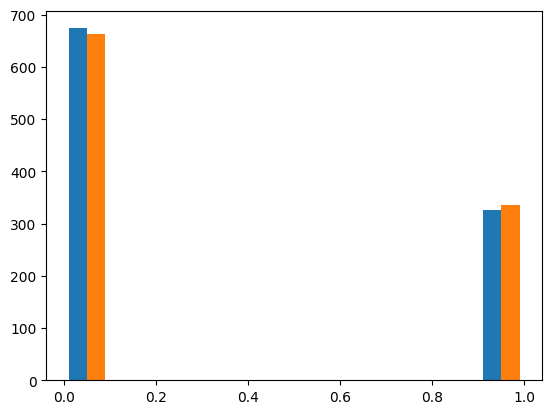

In [19]:
plt.hist(X)
# plt.hist(y)

In [14]:
n_0 = df.loc[df['smoker']==0,].shape[0]
n_1 = df.loc[df['smoker']==1,].shape[0]
n_0, n_1

(674, 326)

In [29]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

(array([[674.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 326.],
        [664.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 336.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 BarContainer objects>)

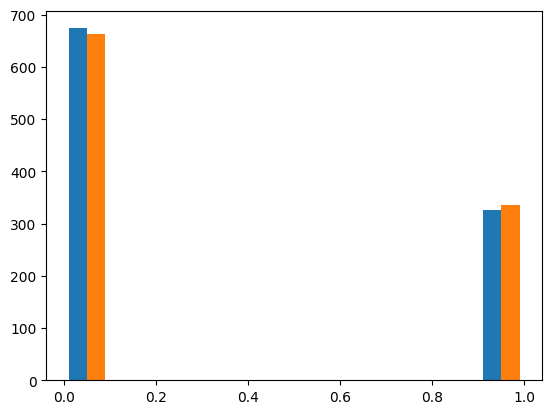

In [30]:
plt.hist(X_tl)
# plt.hist(y_tl)


In [32]:
X_sm.shape

(1464, 2)

(array([[777.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 687.],
        [941.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 523.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 BarContainer objects>)

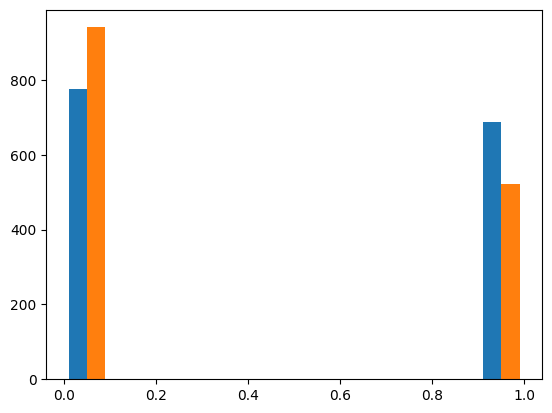

In [31]:
plt.hist(X_sm)
# plt.hist(y_sm)

There are a variety of other methods in the imblearn package for both undersampling(Cluster Centroids, NearMiss, etc.) and oversampling(ADASYN and bSMOTE) that you can check out.